In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('spotify_history.csv')

In [6]:
print(df.head())

        spotify_track_uri           ts    platform  ms_played  \
0  2J3n32GeLmMjwuAzyhcSNe  7/8/13 2:44  web player       3185   
1  1oHxIPqJyvAYHy0PVrDU98  7/8/13 2:45  web player      61865   
2  487OPlneJNni3NWC8SYqhW  7/8/13 2:50  web player     285386   
3  5IyblF777jLZj1vGHG2UD3  7/8/13 2:52  web player     134022   
4  0GgAAB0ZMllFhbNc3mAodO  7/8/13 3:17  web player          0   

                                      track_name        artist_name  \
0                            Say It, Just Say It       The Mowgli's   
1  Drinking from the Bottle (feat. Tinie Tempah)      Calvin Harris   
2                                    Born To Die       Lana Del Rey   
3                               Off To The Races       Lana Del Rey   
4                                      Half Mast  Empire Of The Sun   

                           album_name reason_start reason_end  shuffle  \
0                Waiting For The Dawn     autoplay   clickrow    False   
1                           18 Mon

In [8]:
print(df.describe())

          ms_played
count  1.498600e+05
mean   1.283166e+05
std    1.178401e+05
min    0.000000e+00
25%    2.795000e+03
50%    1.388400e+05
75%    2.185070e+05
max    1.561125e+06


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB
None


In [ ]:
Data Set Overview

Shape:
Data set has 149860 data with 11 columns

Variable type:
Comprising of 8 objects, 1 interger and 2 bool

Basic Statistics:
Count: The number of non-null entries are consistent across variables. Mean Standard Deviation Min and Max Values: Ms_played has a mean of 1.28 a minimum value of 0.0 and maximum value of 1.56.
Percentile(25%,50%, 75%): These indicate the duration of data for instance. 25% of ms_played are within 2,7, 50% are within 1.38 and 75% are within 2.1. 
unique values: Some columns are showing unique values like reason_start showing 149717 and reason _end showing 149743. These unique values are indication of missing values.


In [14]:
print(df.isnull() .sum())

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64


In [ ]:
Checking for missing values. reason_start has 143 missing values and reason_end has 117 missing values.

In [32]:
df.rename(columns={'ts': 'timestamp', 'ms_played': 'milliseconds_played'}, inplace=True)

In [34]:
df['minutes_played'] = df['milliseconds_played'] / (1000 * 60)

In [ ]:
Analyzing the data:

In [36]:
top_tracks = df.groupby('track_name')['milliseconds_played'].sum().sort_values(ascending=False).head(10)
print(top_tracks)

track_name
Ode To The Mets                                                                        67431580
The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee Fleming)     64401661
The Fellowship Reunited (feat. Sir James Galway, Viggo Mortensen and Renée Fleming)    44756730
19 Dias y 500 Noches - En Directo                                                      42914042
In the Blood                                                                           38427087
Claudia's Theme - Version Eight                                                        37120900
Dying Breed                                                                            36182653
The Breaking of the Fellowship (feat. "In Dreams")                                     35990898
All These Things That I've Done                                                        35754915
Caution                                                                                35619945
Name: milliseconds_played, dt

In [ ]:
These are the most played songs 

In [38]:
top_artists = df.groupby('artist_name')['milliseconds_played'].sum().sort_values(ascending=False).head(10)
print(top_artists)

artist_name
The Beatles           1210184552
The Killers           1059556516
John Mayer             725219443
Bob Dylan              569456396
Paul McCartney         357354370
Howard Shore           348930675
The Strokes            317508419
The Rolling Stones     307917009
Pink Floyd             260531842
Led Zeppelin           248338279
Name: milliseconds_played, dtype: int64


In [ ]:
These are the most played artists

In [46]:
df.info

<bound method DataFrame.info of                      spotify_track_uri    platform  milliseconds_played  \
timestamp                                                                 
7/8/13 2:44     2J3n32GeLmMjwuAzyhcSNe  web player                 3185   
7/8/13 2:45     1oHxIPqJyvAYHy0PVrDU98  web player                61865   
7/8/13 2:50     487OPlneJNni3NWC8SYqhW  web player               285386   
7/8/13 2:52     5IyblF777jLZj1vGHG2UD3  web player               134022   
7/8/13 3:17     0GgAAB0ZMllFhbNc3mAodO  web player                    0   
...                                ...         ...                  ...   
12/15/24 23:06  4Fz1WWr5o0OrlIcZxcyZtK     android                 1247   
12/15/24 23:06  0qHMhBZqYb99yhX9BHcIkV     android                 1515   
12/15/24 23:06  0HHdujGjOZChTrl8lJWEIq     android                 1283   
12/15/24 23:06  7peh6LUcdNPcMdrSH4JPsM     android                 1306   
12/15/24 23:06  6iGU74CwXuT4XVepjc9Emf     android                 1

In [50]:
df.columns

Index(['spotify_track_uri', 'platform', 'milliseconds_played', 'track_name',
       'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle',
       'skipped', 'minutes_played'],
      dtype='object')

In [80]:
print(df.head())

                   spotify_track_uri    platform  milliseconds_played  \
reason_start                                                            
autoplay      2J3n32GeLmMjwuAzyhcSNe  web player                 3185   
clickrow      1oHxIPqJyvAYHy0PVrDU98  web player                61865   
clickrow      487OPlneJNni3NWC8SYqhW  web player               285386   
trackdone     5IyblF777jLZj1vGHG2UD3  web player               134022   
clickrow      0GgAAB0ZMllFhbNc3mAodO  web player                    0   

                                                 track_name  \
reason_start                                                  
autoplay                                Say It, Just Say It   
clickrow      Drinking from the Bottle (feat. Tinie Tempah)   
clickrow                                        Born To Die   
trackdone                                  Off To The Races   
clickrow                                          Half Mast   

                    artist_name               

In [98]:
import seaborn as sns

In [100]:
  df.dropna(inplace=True) 

In [102]:
  df['track_name'] = df['track_name'].str.lower()
  df['artist_name'] = df['artist_name'].str.lower()
  df['album_name'] = df['album_name'].str.lower()

In [ ]:
Converted text columns to lowercase to maintain consistency

In [112]:
  shuffle_counts = df['shuffle'].value_counts(normalize=True) * 100
  shuffle_counts

shuffle
True     74.458161
False    25.541839
Name: proportion, dtype: float64

In [ ]:
Shuffle VS played

In [120]:
skip_rate = df['skipped'].value_counts(normalize=True) * 100
print("Percentage of Skipped vs Completed Tracks:\n", skip_rate)

Percentage of Skipped vs Completed Tracks:
 skipped
False    94.749099
True      5.250901
Name: proportion, dtype: float64


In [ ]:
This shows the most skipped tracks 

In [ ]:
Data visualization

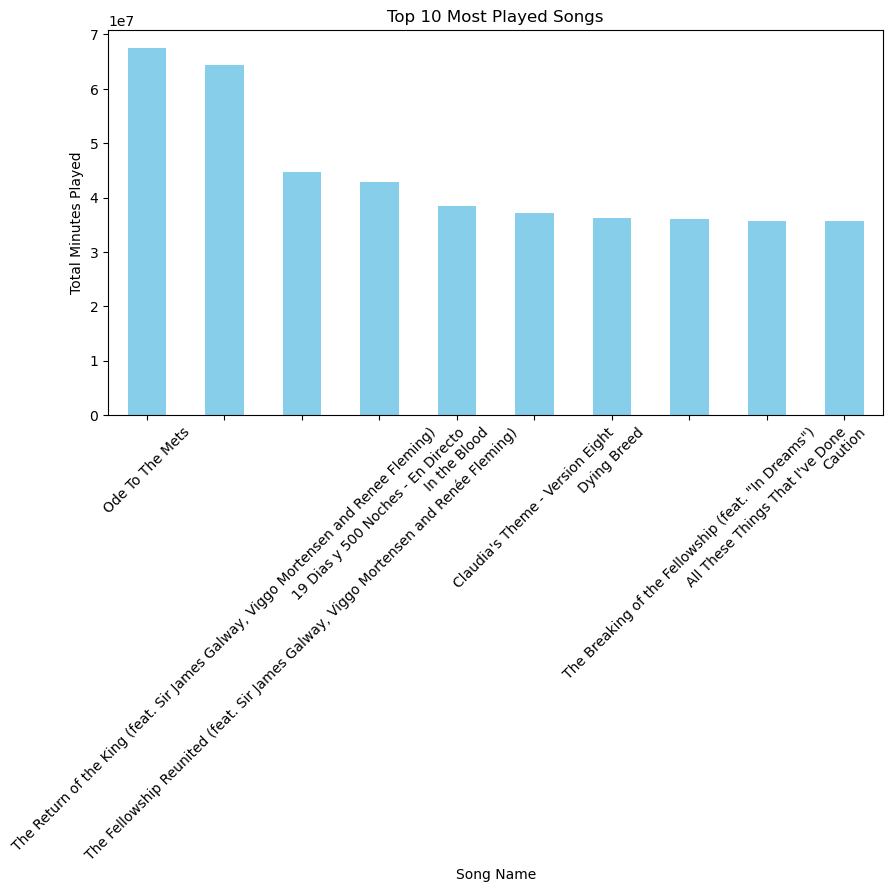

In [122]:
plt.figure(figsize=(10,5))
top_tracks.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Played Songs")
plt.xlabel("Song Name")
plt.ylabel("Total Minutes Played")
plt.xticks(rotation=45)
plt.show()

In [ ]:
This analysis show that certain songs were played more frequently.  Ode to The Mets was played the most.

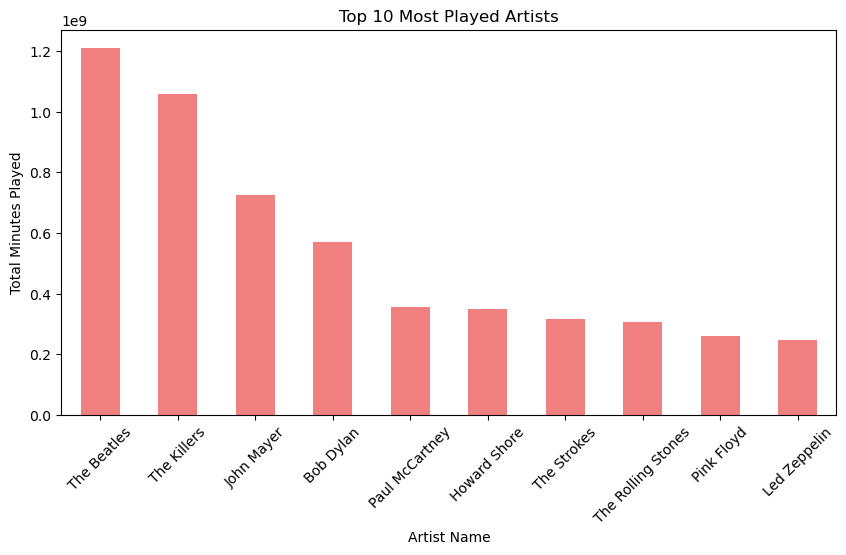

In [124]:
plt.figure(figsize=(10,5))
top_artists.plot(kind='bar', color='lightcoral')
plt.title("Top 10 Most Played Artists")
plt.xlabel("Artist Name")
plt.ylabel("Total Minutes Played")
plt.xticks(rotation=45)
plt.show()

In [ ]:
This analysis shows that Beatles group was the most listened to.

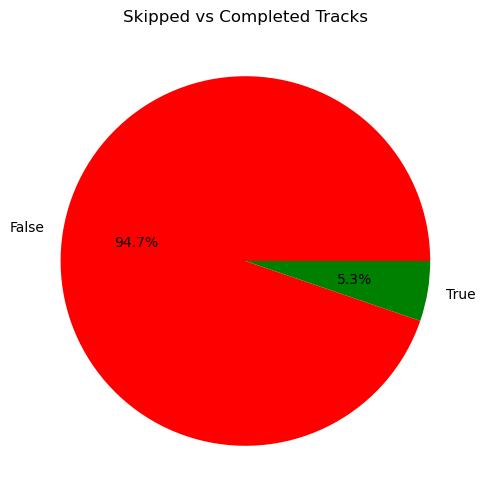

In [126]:
plt.figure(figsize=(6,6))
skip_rate.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'])
plt.title("Skipped vs Completed Tracks")
plt.ylabel("")
plt.show()

In [ ]:
94.7% of the tracks were skipped, indicating that users often move to the next songs before finishing the song.  
Only about 5.3% of the tracks were fully played, which suggests users might be frequently browsing or not engaging with recommended songs. 

In [ ]:
Business Question:  Why is the skip rate so high, and how can users engagement be improved?
From our analysis:

94.7% of tracks were skipped before completion.
Only 5.3% of tracks were completed, which indicates low engagement.
This raises key questions:

Are users skipping songs due to bad recommendations?
Are certain artists, genres, or songs skipped more often?
Do skip rates vary based on platform (mobile vs desktop)?
How does shuffle mode impact song engagement?

In [ ]:
Recommedndations:

In [128]:
skipped_songs = df[df['skipped'] == True]
top_skipped_artists = skipped_songs['artist_name'].value_counts().head(10)
print("Top 10 Most Skipped Artists:\n", top_skipped_artists)

Top 10 Most Skipped Artists:
 artist_name
the beatles           388
the killers           197
bob dylan             163
john mayer            153
led zeppelin          128
the rolling stones    125
the script            121
imagine dragons       116
paul mccartney        107
radiohead             102
Name: count, dtype: int64


In [ ]:
1. Will recommend a better system that will reduce skip rates and increase user rention.

In [130]:
low_skip_songs = df[df['skipped'] == False]['track_name'].value_counts().head(10)
print("Top 10 Least Skipped Songs:\n", low_skip_songs)

Top 10 Least Skipped Songs:
 track_name
ode to the mets                      206
in the blood                         180
dying breed                          164
caution                              162
for what it's worth                  145
19 dias y 500 noches - en directo    143
all these things that i've done      139
concerning hobbits                   135
come together - remastered 2009      135
yesterday - remastered 2009          133
Name: count, dtype: int64


In [ ]:
2. Users will likely spend more time streaming music.

In [132]:
skip_by_shuffle = df.groupby('shuffle')['skipped'].mean() * 100
print("Skip Rate with Shuffle Mode:\n", skip_by_shuffle)

Skip Rate with Shuffle Mode:
 shuffle
False    4.323745
True     5.568949
Name: skipped, dtype: float64


In [ ]:
3.  If users favorite tracks are the preferred tracks, skip rates will be low. 

In [ ]:
Machine Learning 

In [134]:
import pandas as pd
import numpy as np

data = {
    'timestamp': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'milliseconds_played': np.random.randint(1000, 10000, size=100)
}

df = pd.DataFrame(data)


df['day_of_year'] = df['timestamp'].dt.dayofyear


X = df[['day_of_year']]
y = df['milliseconds_played']

In [ ]:
Will divide the data into training and testing sets to evaluate model performance 

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Will impplement linear regression to model the relationship between the day of the year and listening time. 

In [138]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [140]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [142]:
y_pred_linear = linear_model.predict(X_test)


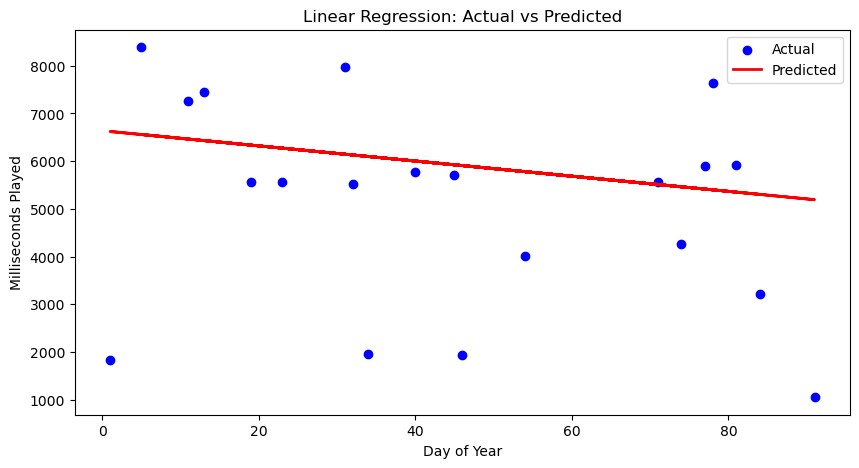

In [144]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Day of Year')
plt.ylabel('Milliseconds Played')
plt.legend()
plt.show()

In [ ]:
The linear regression line shows a slight downward Trend as the day of the year increases. However, the actual values represented by the blue dots show a lot of variation that the linear model doesn't capture very well. The actual values, don't follow a straight line, the model fails to capture the non-linear relationships between day of year and milliseconds. 

In [ ]:
SVR can capture Non-linear relationships in the data.  

In [148]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler



In [150]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [152]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)


SVR(C=100, gamma=0.1)

In [154]:
y_pred_svr = svr_model.predict(X_test_scaled)


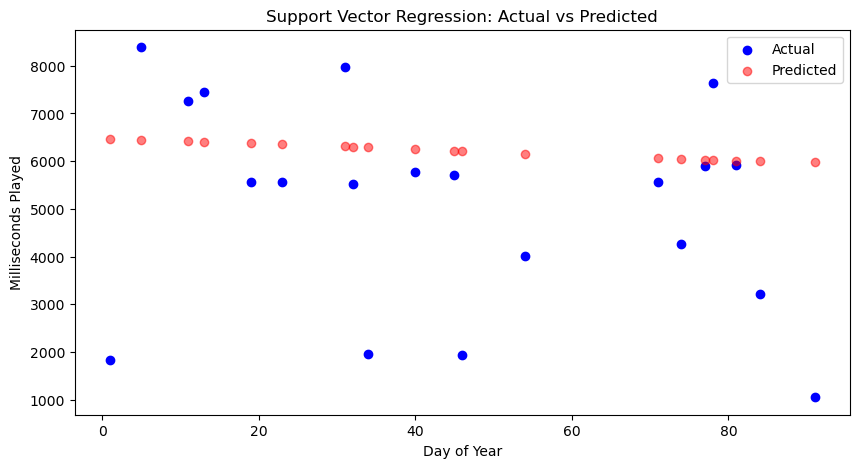

In [156]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_svr, color='red', label='Predicted', alpha=0.5)
plt.title('Support Vector Regression: Actual vs Predicted')
plt.xlabel('Day of Year')
plt.ylabel('Milliseconds Played')
plt.legend()
plt.show()

In [ ]:
Model Evaluation: will be looking at both models using metrics like Mean Absolute Error (MAE) and R-squared.

In [158]:
from sklearn.metrics import mean_absolute_error, r2_score


In [160]:
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)


In [162]:
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'Linear Regression - MAE: {mae_linear:.2f}, R-squared: {r2_linear:.2f}')
print(f'SVR - MAE: {mae_svr:.2f}, R-squared: {r2_svr:.2f}')

Linear Regression - MAE: 1673.68, R-squared: -0.07
SVR - MAE: 1804.92, R-squared: -0.23


In [ ]:
Overall, to predict spotify listening habits, the habit of not skipping non favorite song, randon forest =regressor model is the strongest choice.  Random Forest regressor can handle complex patterns and provide acrate predictions.   

In [ ]:
Random Forest Regressor

In [168]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
